In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = yf.download(tickers='8035.T', start='2019-06-18', end='2024-06-18')

[*********************100%***********************]  1 of 1 completed


In [3]:
display(df.head(1))
display(df.tail(1))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-18,4690.0,4736.666504,4670.0,4706.666504,4204.087891,3639300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-17,34400.0,34420.0,33790.0,34080.0,34080.0,2238500


In [4]:
df = df.reset_index()

In [5]:
display(df.head(1))
display(df.tail(1))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-18,4690.0,4736.666504,4670.0,4706.666504,4204.087891,3639300


,Date,Open,High,Low,Close,Adj Close,Volume
1220,2024-06-17,34400.0,34420.0,33790.0,34080.0,34080.0,2238500


In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [8]:
df['Date'].nunique()

1221

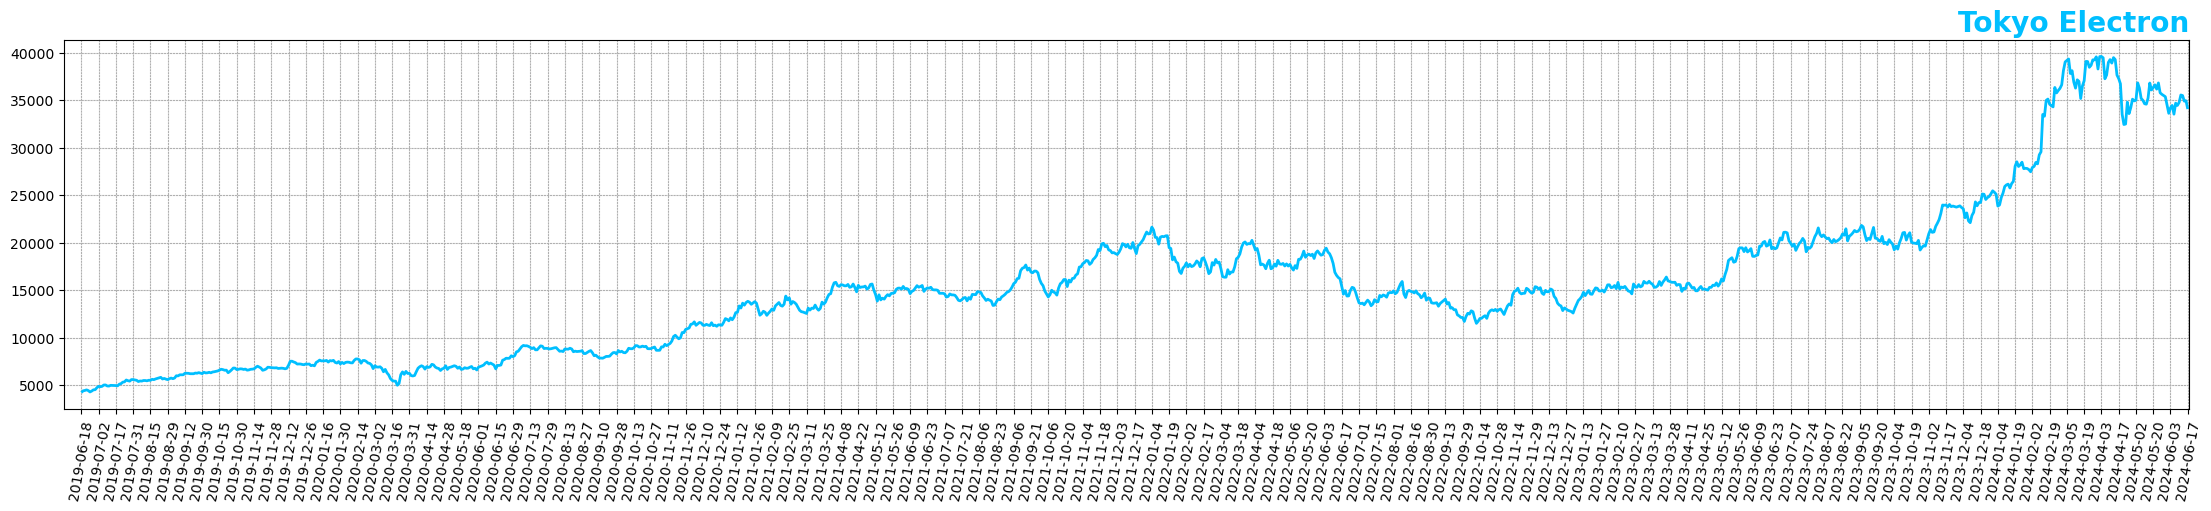

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(22, 5))
plt.style.use('fivethirtyeight')
sns.lineplot(data=df, x='Date', y='Adj Close', lw=2, ci=None, color='deepskyblue')
plt.tick_params('x', rotation=80)
ax.set_title('Tokyo Electron', color='deepskyblue', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
ax.set_xlim(-10, 1221)
ax.set_xticks(np.arange(0, 1221, step=10))
#ax.set_yticks(np.arange(0, 1001, step=200))
plt.show()

In [10]:
df_train = df.copy().rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [11]:
def train_prophet_model(data):
    model = Prophet(
        changepoint_prior_scale=0.05,
        holidays_prior_scale=15,
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False
    )
    model.add_country_holidays(country_name='US')
    model.fit(data)
    return model

In [12]:
df_train = train_prophet_model(df_train)

19:47:35 - cmdstanpy - INFO - Chain [1] start processing
19:47:35 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
def generate_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [14]:
forecast = generate_forecast(df_train)

In [15]:
fc = forecast[['ds', 'trend']]
fc['ds'] = fc['ds'].astype(str)

In [16]:
fc['ds'].nunique()

1586

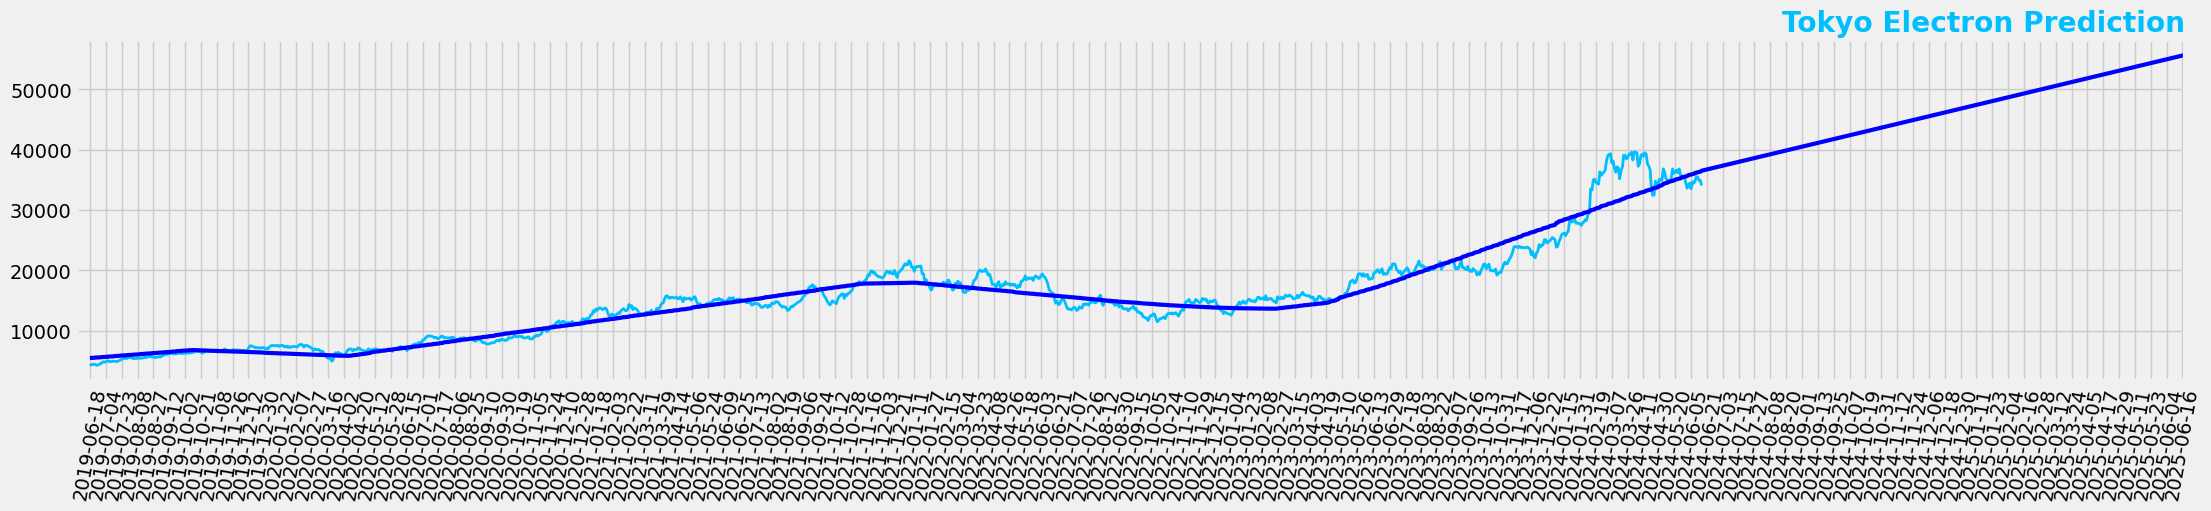

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(22, 5))
plt.style.use('fivethirtyeight')
sns.lineplot(data=df, x='Date', y='Adj Close', lw=2, ci=None, color='deepskyblue')
sns.lineplot(data=fc, x='ds', y='trend', lw=3, color='blue')
plt.tick_params('x', rotation=80)
ax.set_title('Tokyo Electron Prediction', color='deepskyblue', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
ax.set_xlim(-10, 1586)
ax.set_xticks(np.arange(0, 1586, step=12))
#ax.set_yticks(np.arange(0, 1201, step=200))
plt.show()

In [18]:
def plot_forecast(model, forecast):
    model.plot(forecast)

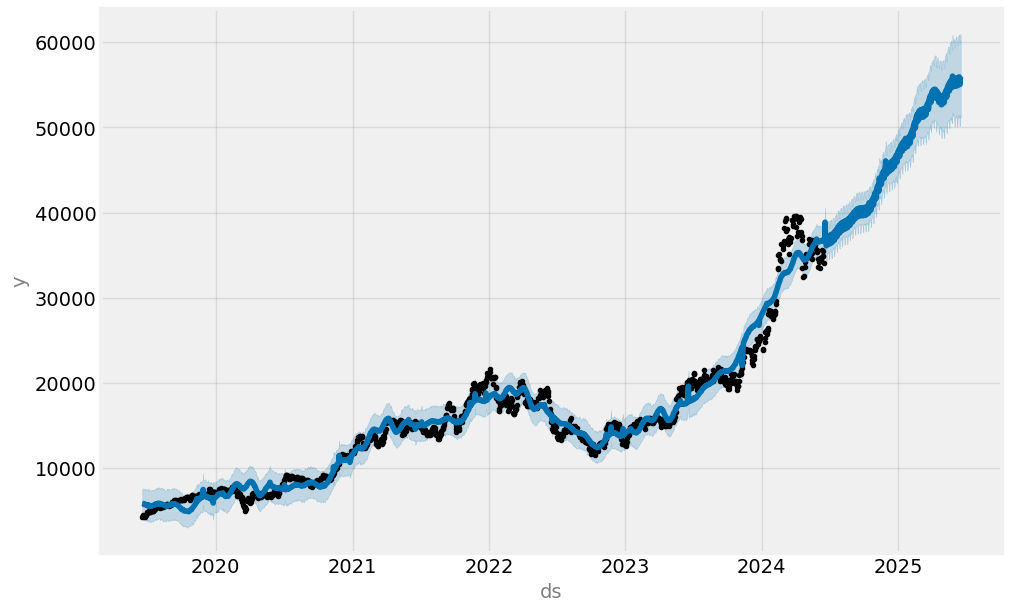

In [19]:
plot_forecast(df_train, forecast)